In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/fake-reg/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
x = df[['feature1', 'feature2']]
x.head()

,feature1,feature2
0,999.787558,999.766096
1,998.861615,1001.042403
2,1000.070267,998.844015
3,999.952251,1000.440940
4,1000.446011,1000.338531


In [6]:
y = df[['price']]
y.head()

,price
0,461.527929
1,548.130011
2,410.297162
3,540.382220
4,546.024553


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
model = Sequential()

model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))

model.add(Dense(units = 1))

In [18]:
model.compile(optimizer = 'adam', loss = "MSE")
model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 250532.4062
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255762.8438 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255025.1250 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261897.7812 
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252390.7812 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255424.0312 
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255313.7031 
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251261.1406 
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251284.0469 
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 241095.9688 
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 234285.7188 
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 230005.4531 
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 223000.2812  
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 

In [19]:
model.history.history

{'loss': [256180.6875,
  255667.75,
  254859.984375,
  255354.4375,
  253977.390625,
  252972.875,
  251610.859375,
  248160.875,
  246296.234375,
  241018.828125,
  234912.0625,
  227852.828125,
  216166.171875,
  203843.625,
  190570.421875,
  172310.859375,
  152701.328125,
  133216.25,
  110699.75,
  88557.3125,
  67027.7265625,
  47370.42578125,
  30351.134765625,
  17681.47265625,
  9468.6923828125,
  4916.78857421875,
  2799.178955078125,
  1993.7811279296875,
  1678.8509521484375,
  1574.6844482421875,
  1533.5006103515625,
  1551.3359375,
  1555.3782958984375,
  1502.3162841796875,
  1524.2471923828125,
  1521.6729736328125,
  1486.3265380859375,
  1470.2877197265625,
  1479.2965087890625,
  1464.2371826171875,
  1453.6451416015625,
  1440.4674072265625,
  1459.1156005859375,
  1428.7769775390625,
  1418.1156005859375,
  1407.9208984375,
  1388.412109375,
  1373.3759765625,
  1424.5062255859375,
  1376.1842041015625,
  1352.4429931640625,
  1336.7099609375,
  1327.6591796875,


In [20]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss
0,256180.687500
1,255667.750000
2,254859.984375
3,255354.437500
4,253977.390625


<Axes: >

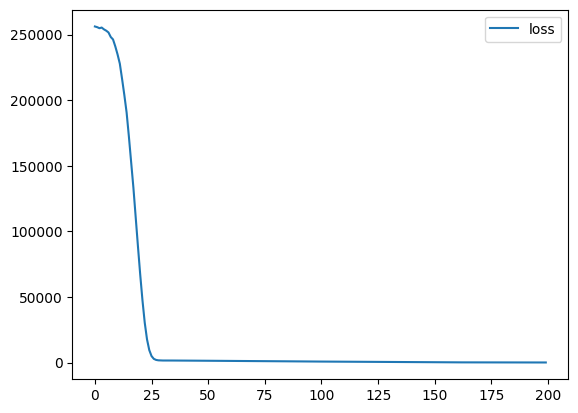

In [21]:
loss_df.plot()

In [22]:
model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7707 


34.20550537109375

In [23]:
model.evaluate(x_train, y_train)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37.2659 


35.96047592163086

In [24]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [25]:
y_pred

array([[408.7443 ],
       [620.5628 ],
       [589.6819 ],
       [571.6715 ],
       [372.9517 ],
       [577.7695 ],
       [516.9652 ],
       [460.29315],
       [549.3364 ],
       [448.90884],
       [609.11255],
       [546.4425 ],
       [422.2796 ],
       [412.62555],
       [645.63513],
       [439.32074],
       [507.42685],
       [657.37054],
       [659.09467],
       [563.5772 ],
       [340.6706 ],
       [447.23096],
       [387.31128],
       [382.91394],
       [565.41895],
       [608.9092 ],
       [532.35876],
       [430.48596],
       [652.5581 ],
       [416.5953 ],
       [444.32013],
       [486.2236 ],
       [440.7629 ],
       [677.9437 ],
       [426.50296],
       [421.51178],
       [500.67502],
       [549.5088 ],
       [511.45218],
       [400.7582 ],
       [615.378  ],
       [419.24124],
       [601.7173 ],
       [446.98407],
       [502.6273 ],
       [578.078  ],
       [663.2868 ],
       [490.672  ],
       [323.79965],
       [486.68692],


In [26]:
y_pred = pd.Series(y_pred.reshape(250,))
y_pred

0      408.744293
1      620.562805
2      589.681885
3      571.671509
4      372.951691
          ...    
245    519.817322
246    459.059265
247    505.347473
248    462.502899
249    588.159424
Length: 250, dtype: float32

In [27]:
y_test = pd.DataFrame(y_test.values, columns = ['True Values'])
y_test.head()

,True Values
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [29]:
new_df = pd.concat([y_test, y_pred], axis = 1)
new_df.head()

,True Values,0
0,402.296319,408.744293
1,624.156198,620.562805
2,582.455066,589.681885
3,578.588606,571.671509
4,371.224104,372.951691


In [30]:
new_df.columns = ['Actual Price', 'Predicted Price']
new_df.head()

,Actual Price,Predicted Price
0,402.296319,408.744293
1,624.156198,620.562805
2,582.455066,589.681885
3,578.588606,571.671509
4,371.224104,372.951691


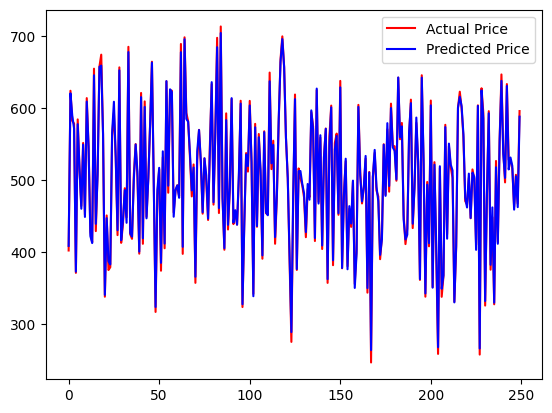

In [33]:
plt.plot(new_df['Actual Price'], color = 'red', label = 'Actual Price')
plt.plot(new_df['Predicted Price'], color = 'blue', label = 'Predicted Price')
plt.legend()
plt.show()

<Axes: xlabel='Actual Price', ylabel='Predicted Price'>

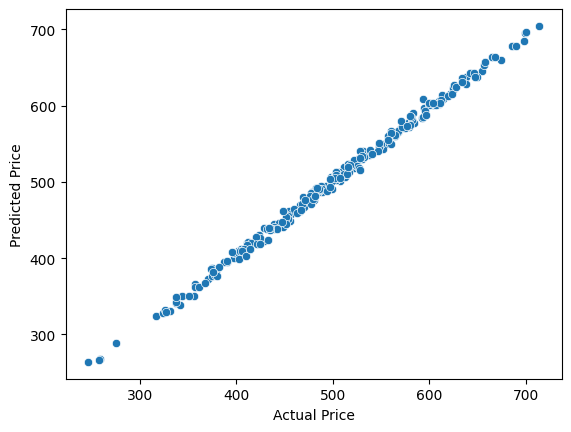

In [34]:
import seaborn as sns
sns.scatterplot(data = new_df, x = 'Actual Price', y = 'Predicted Price')